### imports

In [2]:
from nltk.corpus import stopwords
import nltk
from ploting_functions import *
from common_words_analysis_helper import *

In [3]:
import ploting_functions
import common_words_analysis_helper

In [19]:
import importlib
importlib.reload(ploting_functions)
importlib.reload(common_words_analysis_helper)

<module 'common_words_analysis_helper' from '/Users/elishadiskind-personal/Downloads/NPL_project/common_words_analysis_helper.py'>

In [4]:
nltk.download('stopwords')
nltk.download('punkt')

# Define stop words and preprocess text
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /Users/elishadiskind-
[nltk_data]     personal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/elishadiskind-
[nltk_data]     personal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### read all datasets 

In [8]:
datasets = common_words_analysis_helper.get_all_datasets()
datasets.keys()

dict_keys(['shahafvl/fake_news_GonzaloA_albert_v2_ft', 'shahafvl/fake_news_gonzaloA_gemma_it', 'shahafvl/fake_news_gonzaloA_llama_it', 'shahafvl/fake_news_gonzaloA_llama_it_ft', 'shahafvl/fake_news_gonzaloA_gemma_ft', 'shahafvl/fake_news_gonzaloA_gemma_it_ft', 'shahafvl/fake_news_gonzaloA_gemma_instruct', 'shahafvl/alexander_gemma_it_ft', 'shahafvl/alexander_gemma_ft', 'shahafvl/alexander_gemma_instruct', 'shahafvl/alexander_llama_instruct', 'shahafvl/alexander_llama_it_ft', 'john_validation_gemma_instruct', 'john_train_gemma_it_ft', 'john_validation_albert_v2_ft', 'john_train_gemma_ft', 'john_validation_gemma_it_ft', 'john_test_gemma_it_ft', 'john_train_llama_instruct', 'john_validation_gemma_ft', 'john_test_albert_v2_ft', 'john_test_llama_instruct', 'john_test_gemma_instruct', 'john_train_gemma_instruct', 'john_train_llama_it_ft', 'john_test_gemma_ft', 'john_validation_llama_it_ft', 'john_test_llama_it_ft', 'john_train_albert_v2_ft', 'john_validation_llama_instruct', 'kobby_train_lla

### Models common words by classification

In [9]:
for df_and_model_name, df in datasets.items():
    text_name = 'clean_article' if 'text' not in df.columns else 'text'
    text_col_to_mask = 'clean_input' if 'text' not in df.columns else 'input'
    results = get_filtered_common_words_by_classification_all(df, distance_factor=1.5, text_name=text_name)
    display_comparison_word_clouds_all_morm_methods_combined(results, df_and_model_name)
    

### Prepare files with masked/omitted common words for new prediction

In [10]:
for df_and_model_name, df in datasets.items():
    text_name = 'clean_article' if 'text' not in df.columns else 'text'
    text_col_to_mask = 'clean_input' if 'text' not in df.columns else 'input'
    top_common_words, filtered_common_words_dict, common_words_dict = get_filtered_common_words_by_classification_normalized(df, distance_factor=1.5, text_name=text_name)
    
    top_common_words["input_without_common_words_to_predict"] = top_common_words.apply(lambda x: get_input_without_common_words(x, text_col_to_mask=text_col_to_mask), axis=1)
    
    top_common_words["input_masked_common_words_to_predict"] = top_common_words.apply(lambda x: get_input_without_common_words(x, text_col_to_mask=text_col_to_mask, mask=True), axis=1)
    
    top_common_words.to_parquet(f'data/files_without_or_masked_common_words_to_predict/{df_and_model_name.split("/")[-1]}.parquet', index=False)
    display_comparison_word_clouds(common_words_dict, filtered_common_words_dict, df_and_model_name)

In [11]:
for df_and_model_name, df in datasets.items():
    text_name = 'clean_article' if 'text' not in df.columns else 'text'
    text_col_to_mask = 'clean_input' if 'text' not in df.columns else 'input'
    top_common_words, filtered_common_words_dict, common_words_dict = get_filtered_common_words_by_prediction_normalized(df, distance_factor=2, text_name=text_name)
    
    top_common_words["input_without_common_words_to_predict"] = top_common_words.apply(lambda x: get_input_without_common_words(x, text_col_to_mask=text_col_to_mask), axis=1)
    
    top_common_words["input_masked_common_words_to_predict"] = top_common_words.apply(lambda x: get_input_without_common_words(x, text_col_to_mask=text_col_to_mask, mask=True), axis=1)
    
    top_common_words.to_parquet(f'data/files_without_or_masked_common_words_to_predict_common_by_label_predicted/{df_and_model_name.split("/")[-1]}.parquet', index=False)
    display_comparison_word_clouds_by_prediction(common_words_dict, filtered_common_words_dict, df_and_model_name)

### Read files with prediction on articles with masked/omitted common words 

In [12]:
directory_masked_output = 'data/masked_output/'
files = [f"{directory_masked_output}/{f}" for f in os.listdir(directory_masked_output) if os.path.isfile(os.path.join(directory_masked_output, f))] 

masked_datasets = {}
for file in files:
    masked_datasets[file.split("/")[-1].replace(".parquet", "")] = pd.read_parquet(file)

### Calculate Accuracies for masked words

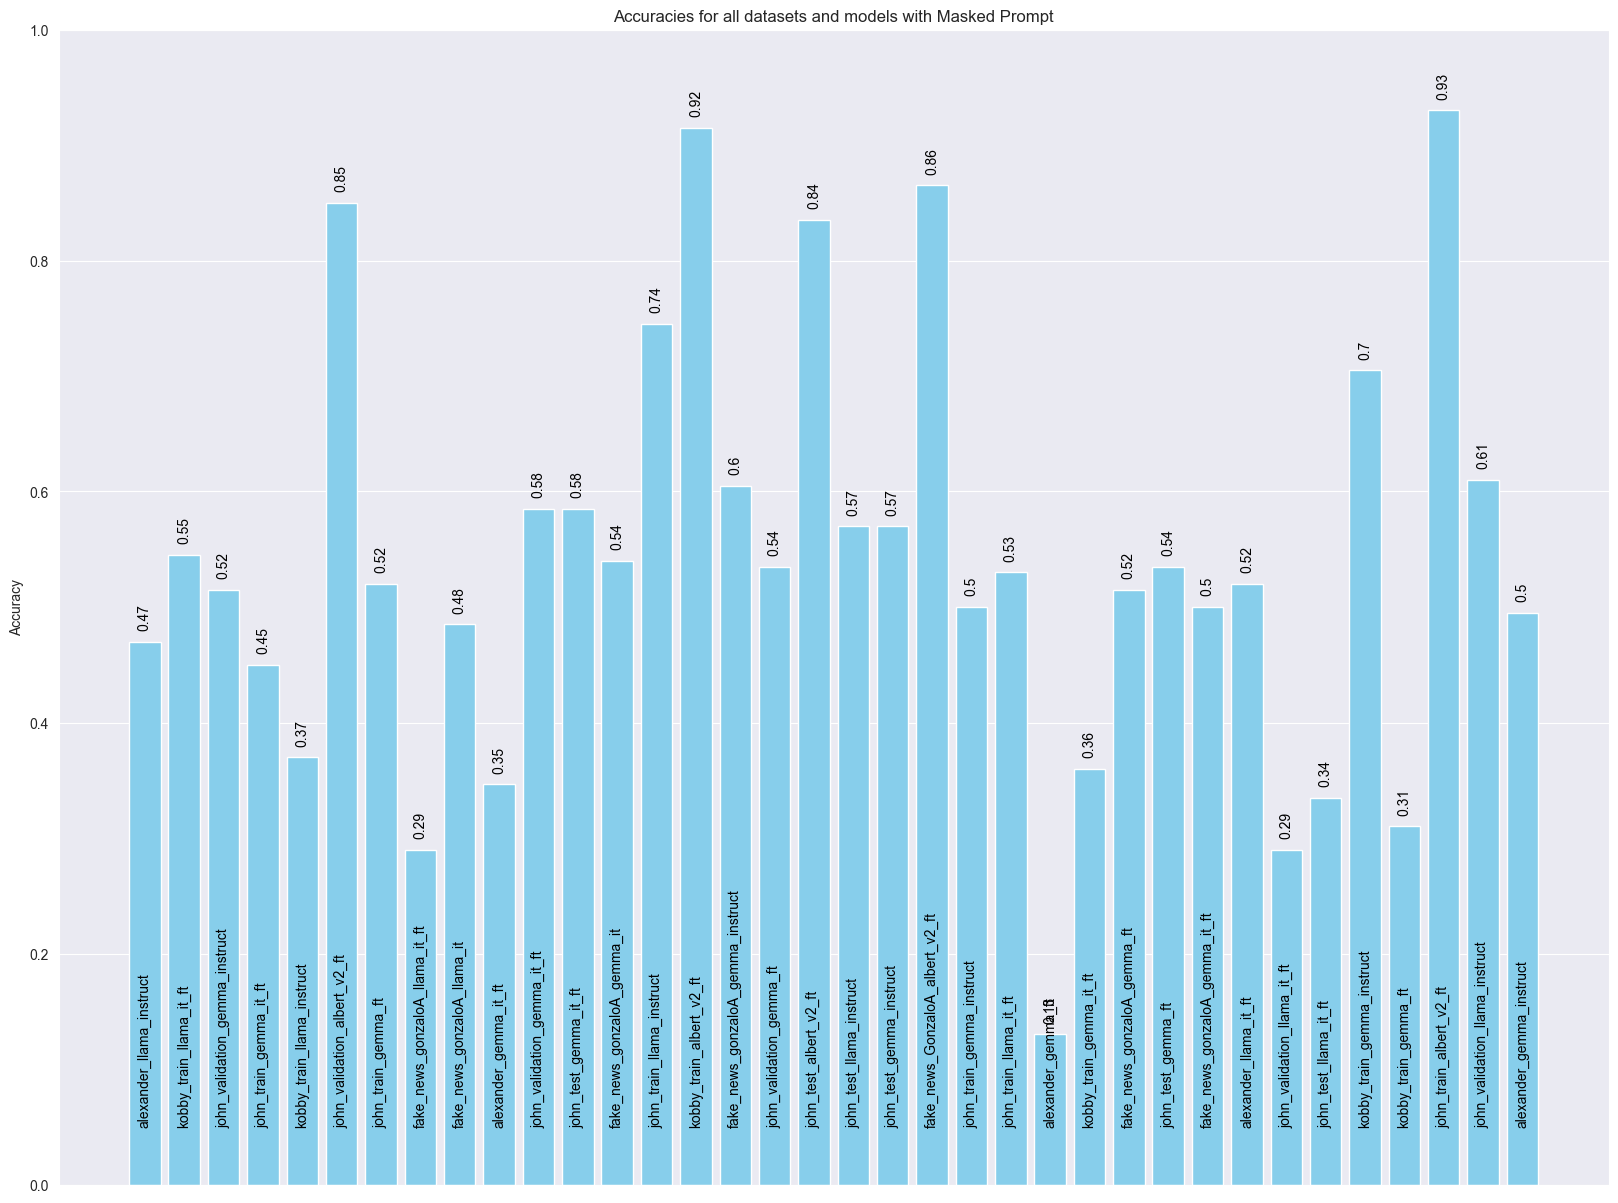

In [13]:
masked_datasets_accuracies  = {data_name: accuracy_score(df['label'], df['pred_masked_common_words']) for data_name, df in masked_datasets.items()}
plot_accuracies(masked_datasets_accuracies, title='Accuracies for all datasets and models with Masked Prompt')

### Calculate Accuracies for omitted words

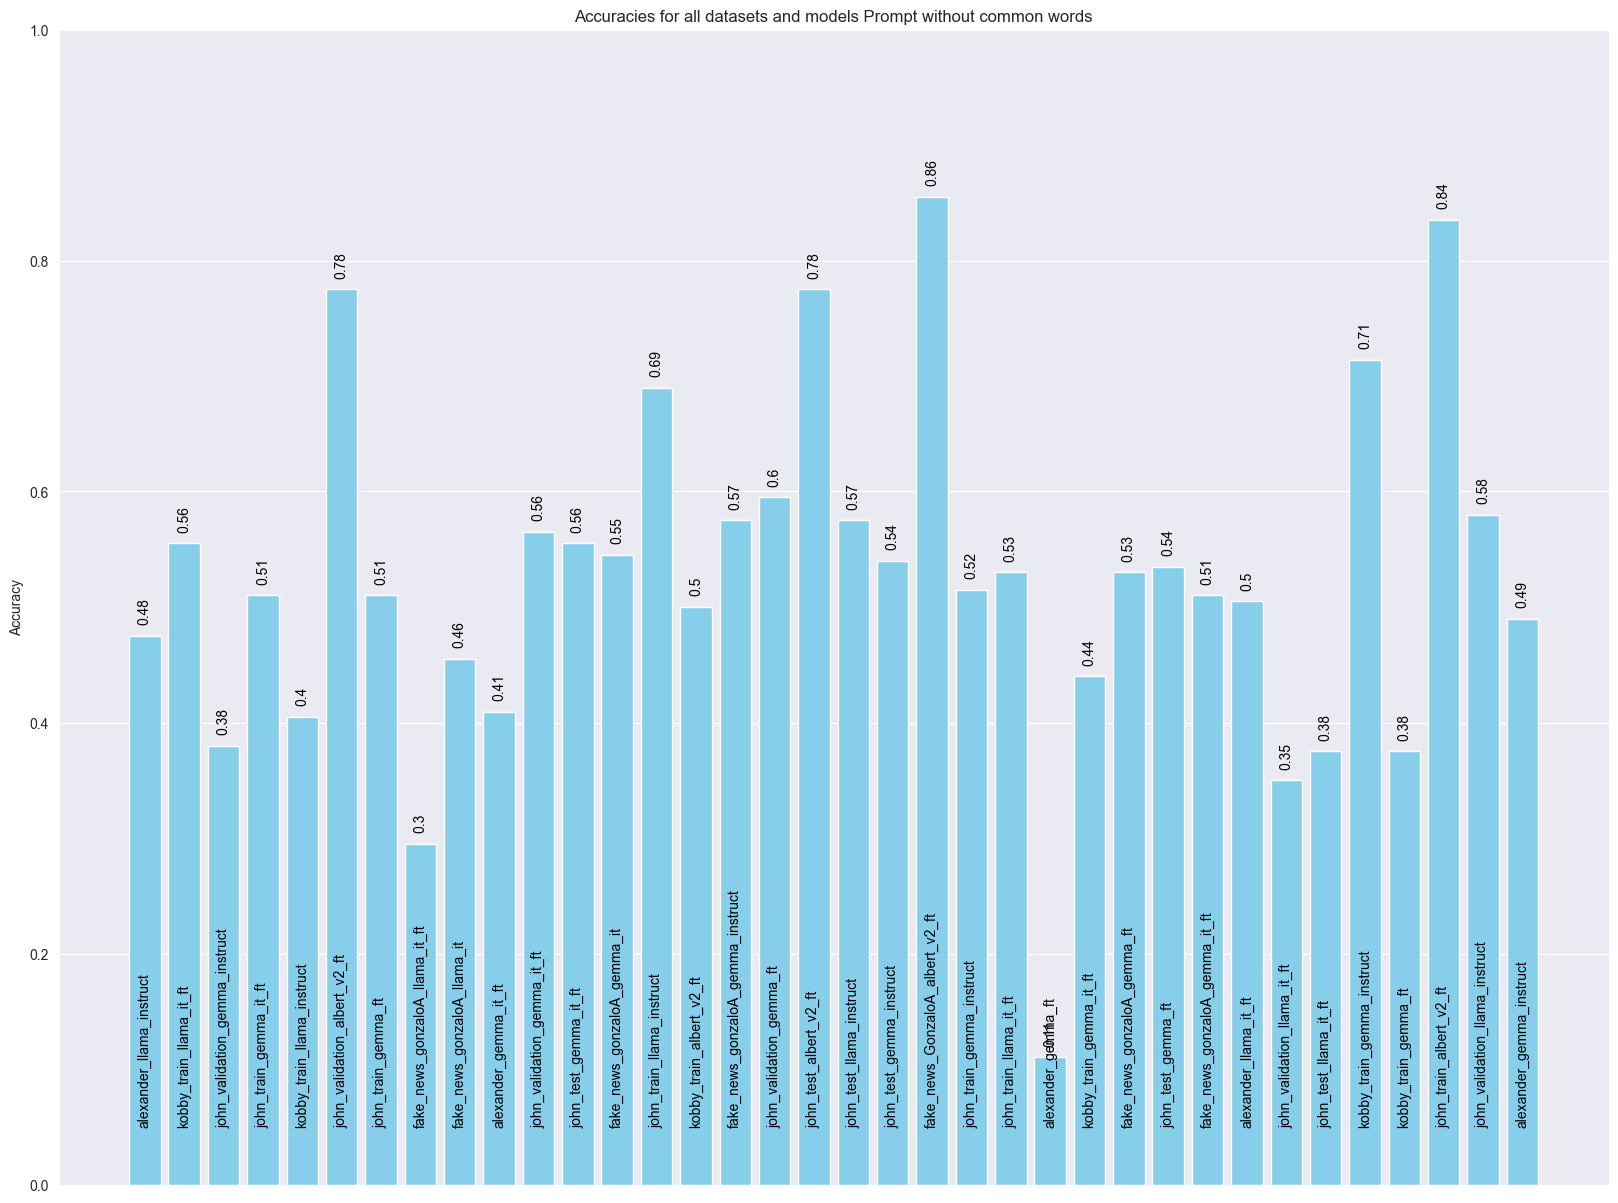

In [14]:
without_datasets_accuracies  = {data_name: accuracy_score(df['label'], df['pred_without_common_words']) for data_name, df in masked_datasets.items()}
plot_accuracies(without_datasets_accuracies, title='Accuracies for all datasets and models Prompt without common words')

### Analyse difference between masked and omitted words

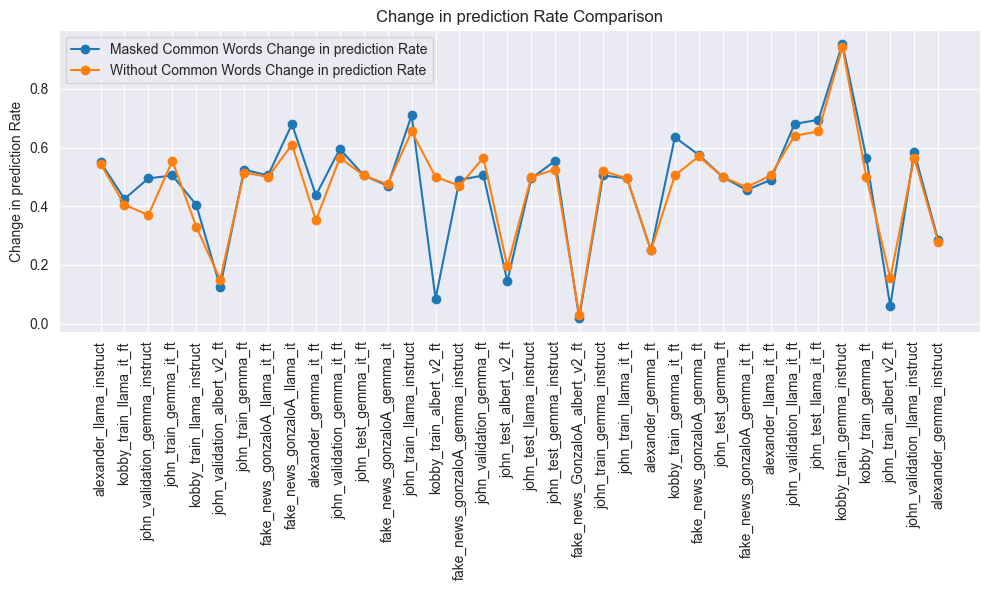

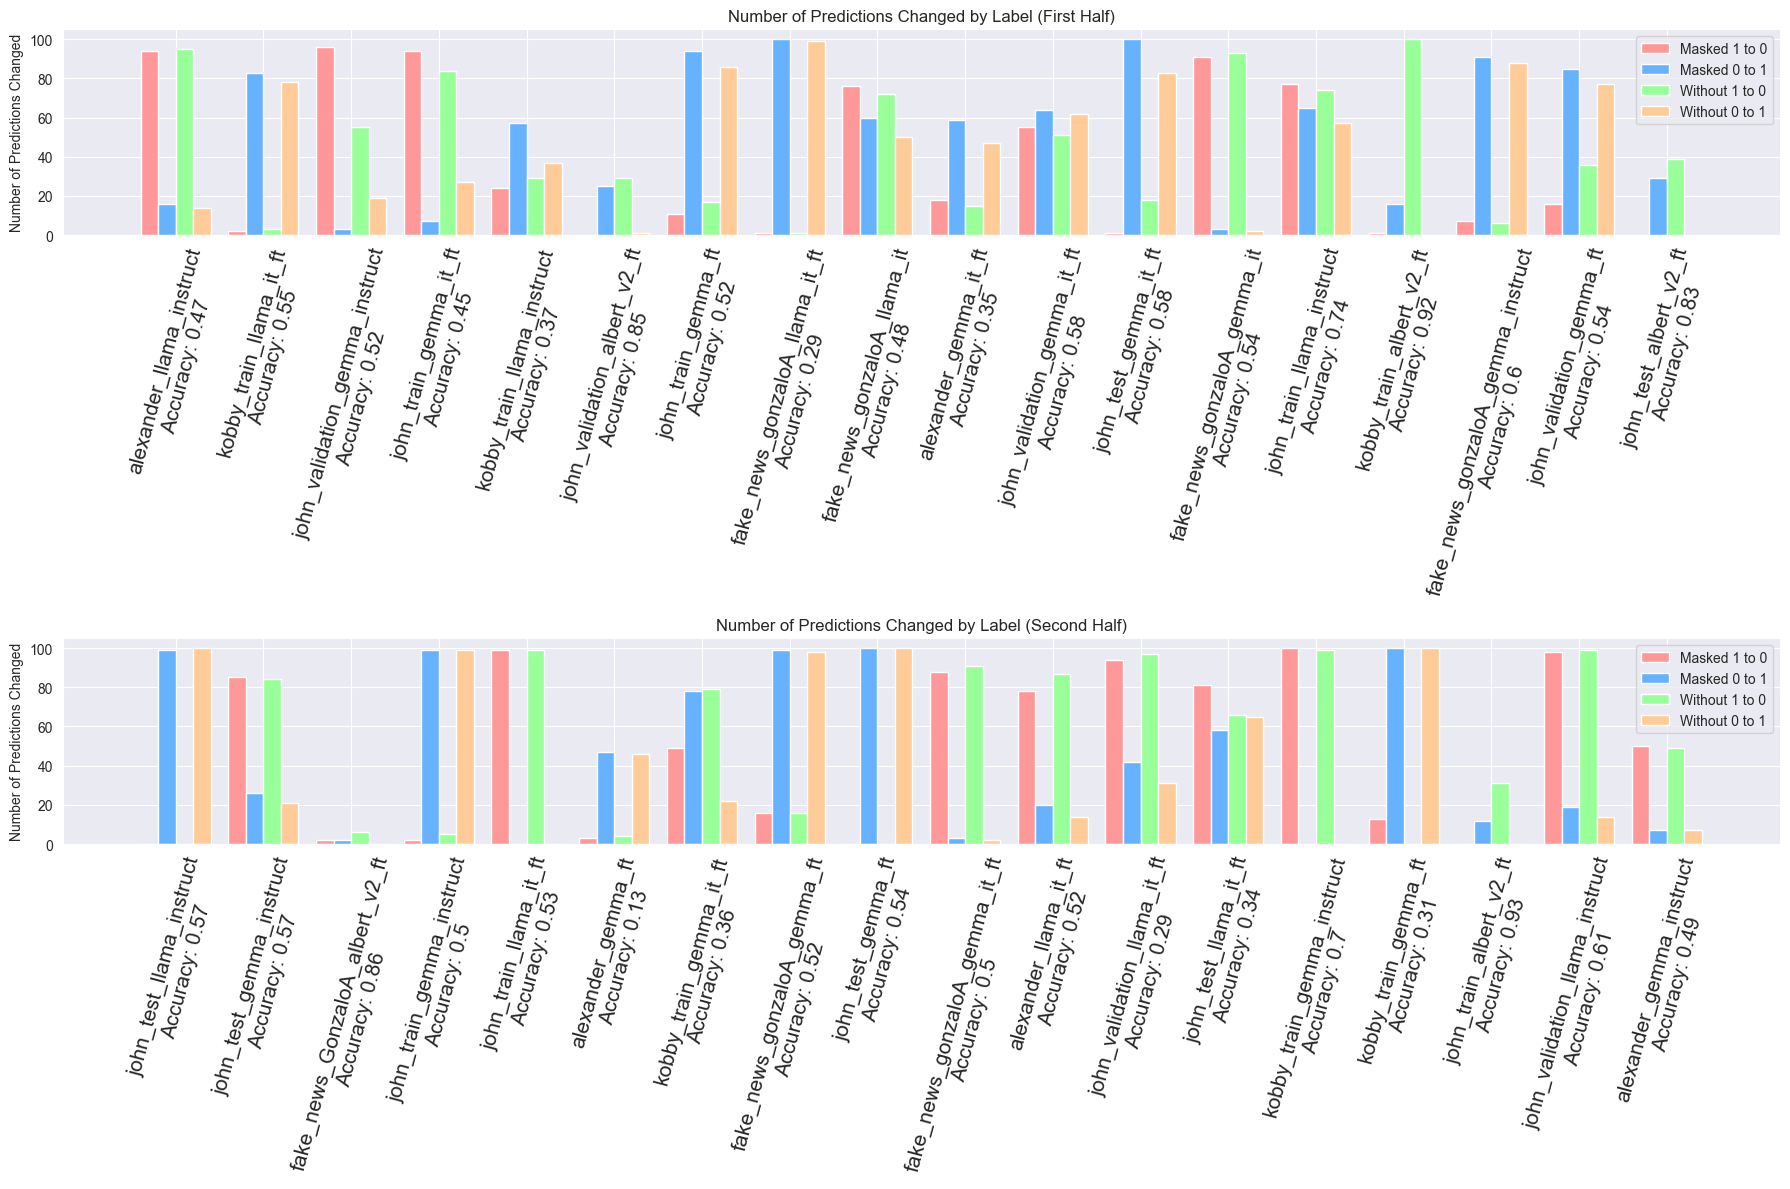

In [22]:
plot_metrics(masked_datasets, masked_datasets_accuracies)

### Analyse how many the ratio of changed predictions by the number of masked words

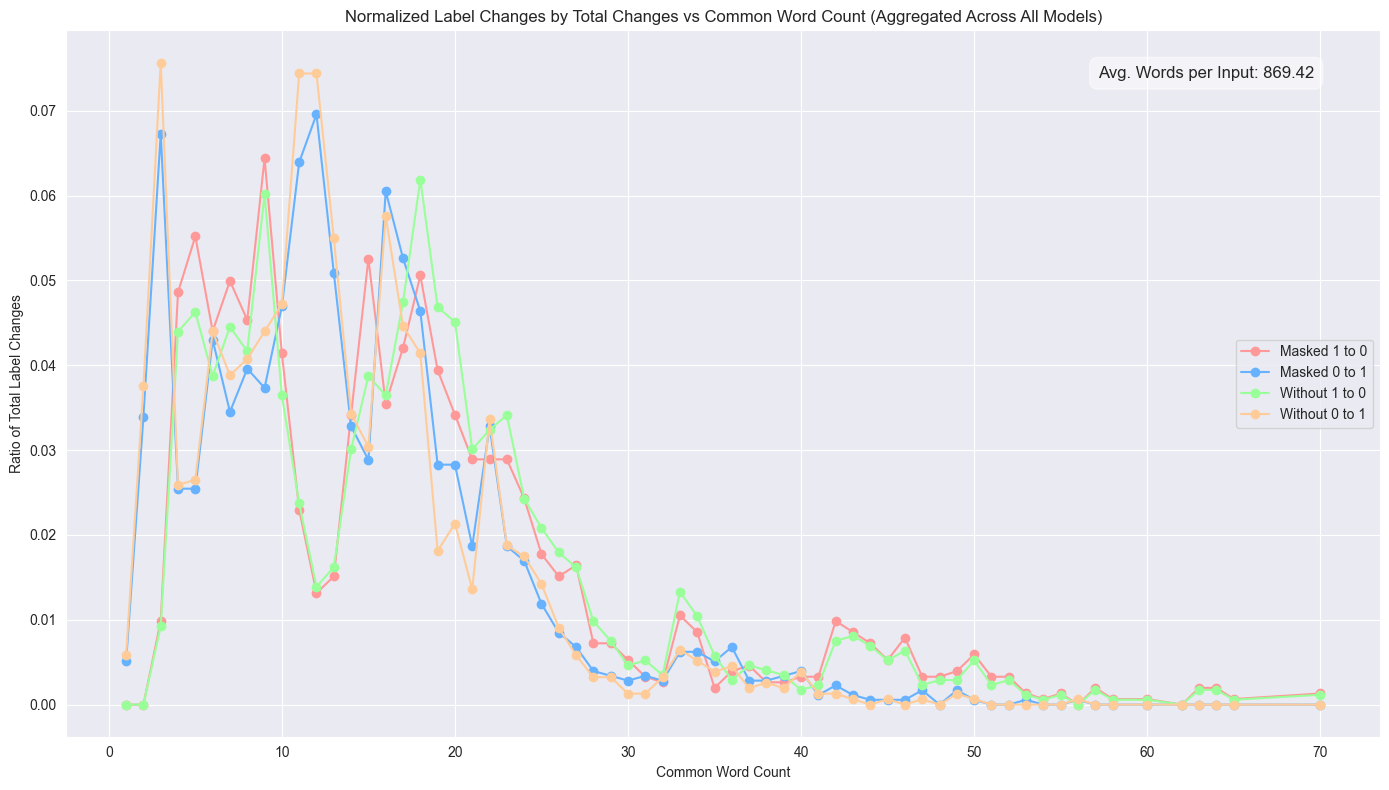

In [21]:
common_words_analysis_helper.plot_normalized_label_changes_with_avg_word_count(masked_datasets)